In [ ]:
# Author: Abdullah Aderinto

In [ ]:
# Heart Attack Risk Predictor

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

In [24]:
#LOADING THE DATASET

In [25]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [26]:
#CHECK FOR MISSING VALUES

In [27]:
null = pd.isnull(df)
null.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
#TOTAL NUMBER OF MISSING VALUES

In [29]:
 pd.isnull(df).sum().sum()

0

In [30]:
#DROP COLUMNS WITH MISSING VALUES, THERE ARE NO MISSING VALUES BUT THIS IS FOR VALIDATION

In [31]:
df = df.dropna()

In [32]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [33]:
#TURN CATEGORICAL VARIABLES INTO BINARY AND DROPPING THE COLUMN (HOT ENCODING)

In [34]:
df = pd.concat([df.drop('Diet', axis=1),pd.get_dummies(df.Diet).add_prefix('Diet_')],axis =1)
df = pd.concat([df.drop('Country', axis=1),pd.get_dummies(df.Country).add_prefix('Country_')],axis =1)
df = pd.concat([df.drop('Continent', axis=1),pd.get_dummies(df.Continent).add_prefix('Continent_')],axis =1)

In [35]:
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,False,False,False,False,False,False,False,False,True,False
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,False,False,False,False,False,False,False,False,True,False
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,True,False,False,False,False,True,False,False,False,False
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,False,False,False,False,False,False,False,False,True,False
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,False,False,False,False,False,False,False,False,False,True
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,False,False,False,False,False,False,False,False,False,True


In [36]:
#DROPPING PATEINT ID COLUMN AS IT IS NOT IMPORTANT

In [37]:
df = df.drop('Patient ID', axis=1)

In [38]:
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,67,Male,208,158/88,72,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True
1,21,Male,389,165/93,98,1,1,1,1,1,...,False,False,False,False,False,False,False,False,True,False
2,21,Female,324,174/99,72,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,84,Male,383,163/100,73,1,1,1,0,1,...,False,False,False,False,False,False,False,False,True,False
4,66,Male,318,91/88,93,1,1,1,1,0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,True,False,False,False,False,True,False,False,False,False
8759,28,Female,120,157/102,73,1,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
8760,47,Male,250,161/75,105,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
8761,36,Male,178,119/67,60,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True


In [39]:
#Encoding Sex and Hemisphere as binary features

In [40]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
df['Hemisphere'] = df['Hemisphere'].apply(lambda x: 1 if x == 'Northern Hemisphere' else 0)

In [41]:
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,67,1,208,158/88,72,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True
1,21,1,389,165/93,98,1,1,1,1,1,...,False,False,False,False,False,False,False,False,True,False
2,21,0,324,174/99,72,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,84,1,383,163/100,73,1,1,1,0,1,...,False,False,False,False,False,False,False,False,True,False
4,66,1,318,91/88,93,1,1,1,1,0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,94/76,61,1,1,1,0,1,...,True,False,False,False,False,True,False,False,False,False
8759,28,0,120,157/102,73,1,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
8760,47,1,250,161/75,105,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
8761,36,1,178,119/67,60,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True


In [42]:
#VIEWING THE COLUMNS

In [43]:
df.columns.values

array(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Hemisphere', 'Heart Attack Risk', 'Diet_Average', 'Diet_Healthy',
       'Diet_Unhealthy', 'Country_Argentina', 'Country_Australia',
       'Country_Brazil', 'Country_Canada', 'Country_China',
       'Country_Colombia', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Italy', 'Country_Japan',
       'Country_New Zealand', 'Country_Nigeria', 'Country_South Africa',
       'Country_South Korea', 'Country_Spain', 'Country_Thailand',
       'Country_United Kingdom', 'Country_United States',
       'Country_Vietnam', 'Continent_Africa', 'Continent_Asia',
       'Continent_Australia', 

In [ ]:
#Changing the Blood Pressure column from fractions to floating point values

In [45]:
df["Blood Pressure"] = df["Blood Pressure"].str.split("/").apply(lambda x: float(x[0]) / float(x[1]))

In [46]:
df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,67,1,208,1.795455,72,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True
1,21,1,389,1.774194,98,1,1,1,1,1,...,False,False,False,False,False,False,False,False,True,False
2,21,0,324,1.757576,72,1,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,84,1,383,1.630000,73,1,1,1,0,1,...,False,False,False,False,False,False,False,False,True,False
4,66,1,318,1.034091,93,1,1,1,1,0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,1.236842,61,1,1,1,0,1,...,True,False,False,False,False,True,False,False,False,False
8759,28,0,120,1.539216,73,1,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
8760,47,1,250,2.146667,105,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
8761,36,1,178,1.776119,60,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
#VIEWING A HEATMAP TO LOOK FOR CORRELATIONS

<Axes: >

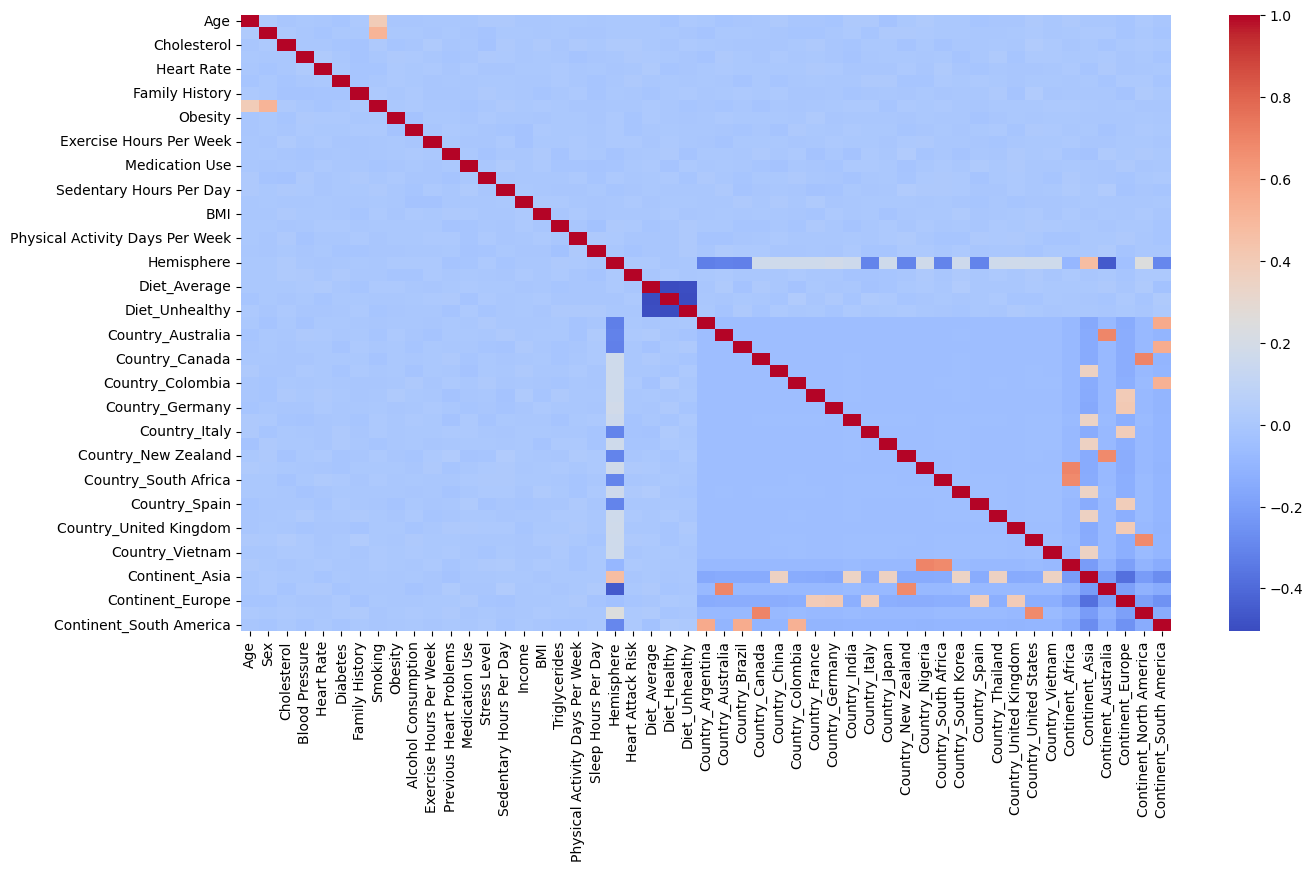

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = False, cmap='coolwarm')

In [ ]:
#CORRELATIONS ARE TOO MANY, THEREFORE DROPPING COLUMNS LEAST CORRELATED TO THE HEART ATTACK RISK

In [48]:
correlations = df. corr()['Heart Attack Risk'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [49]:
df_dropped

,Cholesterol,Blood Pressure,Diabetes,Sleep Hours Per Day,Heart Attack Risk,Country_India,Country_Italy,Country_Nigeria,Country_South Korea,Country_United States,Continent_Europe
0,208,1.795455,0,6,0,False,False,False,False,False,False
1,389,1.774194,1,7,0,False,False,False,False,False,False
2,324,1.757576,1,4,0,False,False,False,False,False,True
3,383,1.630000,1,4,0,False,False,False,False,False,False
4,318,1.034091,1,5,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8758,121,1.236842,1,7,0,False,False,False,False,False,False
8759,120,1.539216,1,9,0,False,False,False,False,False,False
8760,250,2.146667,0,4,1,False,False,False,False,False,False
8761,178,1.776119,1,8,0,False,False,False,False,False,False


In [ ]:
#VIEW HEATMAP 

<Axes: >

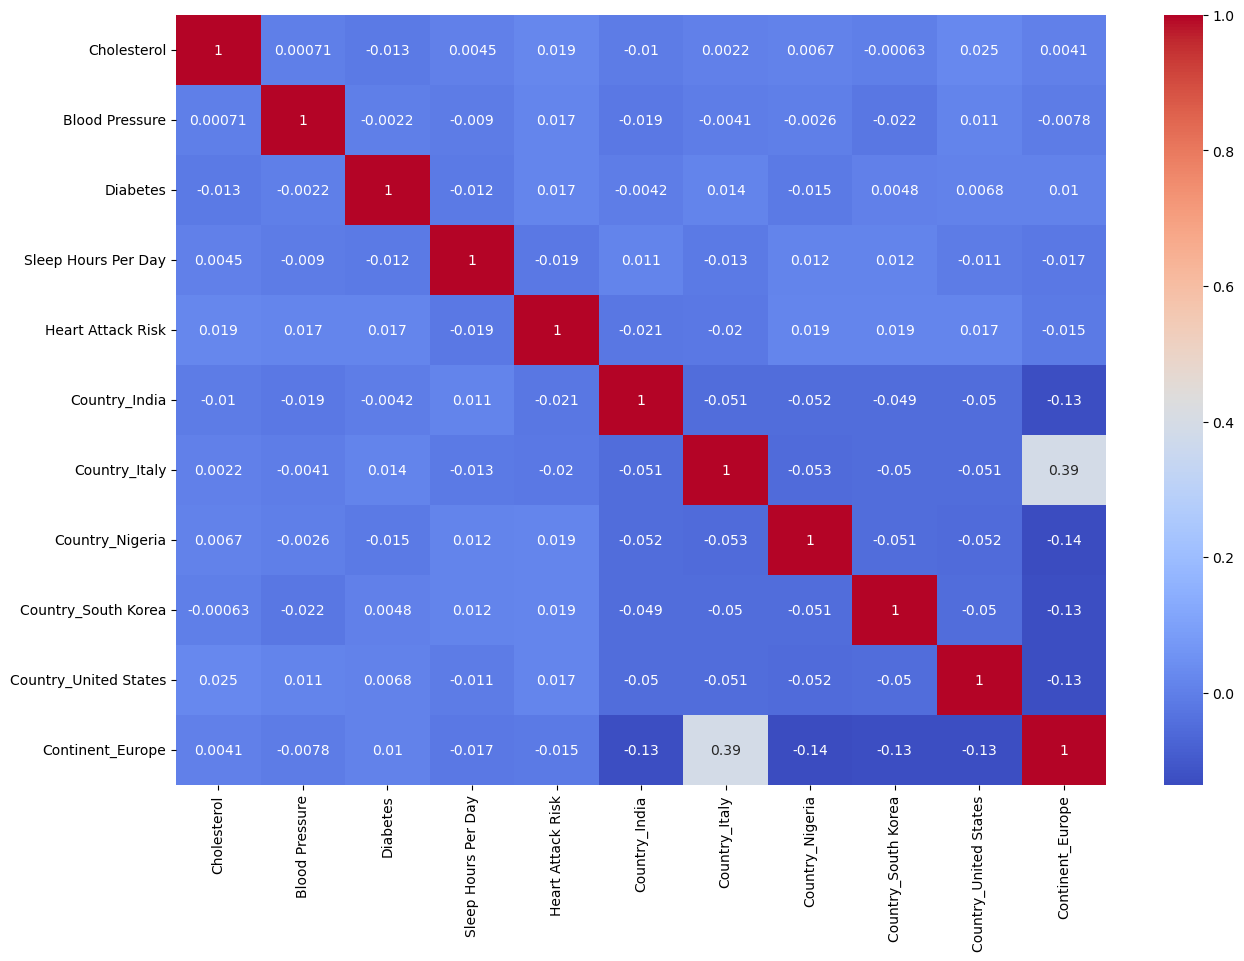

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot = True, cmap='coolwarm')

In [ ]:
#TRAINING THE DATA USING RANDOMFOREST(ENSEMBLE OF DECISION TREES)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2) #20% OF DATA BEING TESTED

In [52]:
#DISPLAY TRAINING DATAFRAME

In [53]:
train_df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
7764,82,1,122,1.566038,52,1,1,1,0,1,...,False,False,False,False,False,False,True,False,False,False
4931,72,1,393,1.875000,52,0,1,1,0,1,...,False,False,False,False,False,False,False,False,False,True
6573,41,0,192,1.213333,72,1,0,1,0,1,...,False,False,False,False,False,False,False,False,False,True
3486,18,1,303,1.875000,56,0,0,1,1,1,...,False,False,False,False,False,True,False,False,False,False
1274,39,0,149,1.384615,78,1,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5545,21,1,337,2.202899,59,1,0,1,1,1,...,False,False,False,False,False,False,True,False,False,False
7555,68,1,264,1.244444,100,0,1,1,0,1,...,True,False,False,False,False,True,False,False,False,False
1889,86,0,124,1.469388,66,1,0,1,0,1,...,False,False,True,False,False,False,False,False,True,False
1924,74,0,400,1.547619,44,1,1,1,0,0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
#DISPLAYING TESTING DATAFRAME

In [54]:
test_df

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
4313,39,0,166,1.490909,76,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3662,84,1,347,1.257426,99,1,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
800,20,1,380,2.048193,106,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,True
2049,65,0,246,1.576923,99,1,1,1,0,1,...,False,False,False,False,False,False,False,True,False,False
4790,23,1,372,1.880597,53,1,1,1,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,46,1,348,2.306667,98,1,0,1,0,1,...,True,False,False,False,False,True,False,False,False,False
786,33,1,368,1.284314,88,0,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
7530,63,1,185,2.507692,102,1,0,1,1,0,...,False,False,False,False,False,False,False,True,False,False
1468,41,1,171,1.546875,92,1,0,1,1,1,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
#SPLIT INTO X AND Y DATA

In [55]:
train_X = train_df.drop('Heart Attack Risk', axis=1)
train_y = train_df['Heart Attack Risk']

test_X= test_df.drop('Heart Attack Risk', axis=1)
test_y = test_df['Heart Attack Risk']

In [56]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [ ]:
#EVALUATE ON TEST DATA TO SEE ITS PERFORMANCE

In [57]:
forest.score(test_X,test_y)

0.6200798630918426

In [ ]:
# 62.01% of the time accurate in predicting whether a person is at risk of a heart attack

In [ ]:
#View the feature importances

In [58]:
forest.feature_importances_

array([0.06391188, 0.01007797, 0.06996311, 0.07307179, 0.06628892,
       0.01104754, 0.0121896 , 0.00571058, 0.01224841, 0.01212135,
       0.07478507, 0.01273838, 0.01165914, 0.04254432, 0.07254607,
       0.07389294, 0.07586358, 0.07311508, 0.03897461, 0.03538351,
       0.00760602, 0.0096598 , 0.00965083, 0.01017443, 0.00374339,
       0.00377023, 0.00383641, 0.00394427, 0.00418939, 0.00412791,
       0.00414783, 0.00442747, 0.00382937, 0.00330516, 0.00417511,
       0.00385658, 0.00387611, 0.00355088, 0.00416067, 0.00344236,
       0.00405077, 0.00404166, 0.00359047, 0.00426279, 0.00504377,
       0.00727094, 0.00513849, 0.00752109, 0.00523363, 0.00623832])

In [ ]:
#VIEW THE FEATURE NAMES

In [59]:
forest.feature_names_in_

array(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Hemisphere', 'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy',
       'Country_Argentina', 'Country_Australia', 'Country_Brazil',
       'Country_Canada', 'Country_China', 'Country_Colombia',
       'Country_France', 'Country_Germany', 'Country_India',
       'Country_Italy', 'Country_Japan', 'Country_New Zealand',
       'Country_Nigeria', 'Country_South Africa', 'Country_South Korea',
       'Country_Spain', 'Country_Thailand', 'Country_United Kingdom',
       'Country_United States', 'Country_Vietnam', 'Continent_Africa',
       'Continent_Asia', 'Continent_Australia', 'Continent_Europe',
       '

In [ ]:
#COMBINE FEATURE IMPORTANCES AND NAMES AND VIEW THEM

In [60]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [61]:
importances

{'BMI': 0.07586358115042219,
 'Exercise Hours Per Week': 0.07478506996520445,
 'Income': 0.07389294303855626,
 'Triglycerides': 0.07311507658608682,
 'Blood Pressure': 0.07307179281495078,
 'Sedentary Hours Per Day': 0.07254607107668365,
 'Cholesterol': 0.06996311202039236,
 'Heart Rate': 0.06628891845100898,
 'Age': 0.0639118811066779,
 'Stress Level': 0.042544315651216975,
 'Physical Activity Days Per Week': 0.038974610602350024,
 'Sleep Hours Per Day': 0.03538351350920813,
 'Previous Heart Problems': 0.012738381373646364,
 'Obesity': 0.012248411204132623,
 'Family History': 0.012189604083695888,
 'Alcohol Consumption': 0.012121345110682429,
 'Medication Use': 0.01165913614262164,
 'Diabetes': 0.011047543530982418,
 'Diet_Unhealthy': 0.010174430881191075,
 'Sex': 0.010077965062629599,
 'Diet_Average': 0.009659801417595074,
 'Diet_Healthy': 0.009650827060824844,
 'Hemisphere': 0.0076060196811291395,
 'Continent_Europe': 0.007521086020907861,
 'Continent_Asia': 0.007270935117135353,
 '

In [ ]:
#HYPERPARAMETER TUNING

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators':[50,100,250],
    'max_depth': [5,10,30],
    'min_samples_split':[2,4],
    'max_features': ['sqrt','log2']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [63]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/36] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.646 total time=   0.2s
[CV 2/5; 1/36] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/36] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.647 total time=   0.2s
[CV 3/5; 1/36] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/36] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.647 total time=   0.2s
[CV 4/5; 1/36] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/36] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.647 total time=   0.2s
[CV 5/5; 1/36] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [ ]:
#VIEW BEST ESTIMATOR

In [64]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=50)

In [ ]:
# MEAN ACCURACY SCORE CHECK

In [65]:
forest = grid_search.best_estimator_

In [66]:
forest.score(test_X, test_y)

0.6217912150598973

In [ ]:
#62.18% of the time accurate in predicting whether a person is at risk of a heart attack

In [ ]:
#LOOK AT THE FEATURE IMPORTANCES FOR THE TWEAKED MODEL

In [67]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [68]:
importances

{'BMI': 0.12367443743436506,
 'Triglycerides': 0.1019595508915084,
 'Exercise Hours Per Week': 0.0891703911584266,
 'Sedentary Hours Per Day': 0.08791850584496358,
 'Blood Pressure': 0.07332894786102909,
 'Income': 0.06317687366293036,
 'Cholesterol': 0.05956528104856106,
 'Heart Rate': 0.0578123205625479,
 'Age': 0.05703183763020563,
 'Stress Level': 0.032335887224592505,
 'Physical Activity Days Per Week': 0.03067252931536527,
 'Sleep Hours Per Day': 0.0291062361263836,
 'Diabetes': 0.013668226861852435,
 'Obesity': 0.012426939024751888,
 'Country_Italy': 0.008818700508660156,
 'Diet_Unhealthy': 0.008251526822249026,
 'Diet_Healthy': 0.00697484967388198,
 'Country_Australia': 0.006923791475696795,
 'Hemisphere': 0.006710589313518953,
 'Country_South Korea': 0.006493471604581378,
 'Continent_North America': 0.006236771956177549,
 'Continent_Europe': 0.00621199866296907,
 'Medication Use': 0.006095020715752679,
 'Diet_Average': 0.006078231872043176,
 'Sex': 0.005760491270705623,
 'Coun